Omitting the league that we will use for GAS-model. 

In [502]:
import os
import sys
import pandas as pd
import numpy as np
import create_dicts


code_path = os.getcwd()
data_path = "C:/Users/XHK/Desktop/thesis_code/events_analysis/data/raw/kaggle"

event_type1, event_type2, side, shot_place, shot_outcome, location, \
    bodypart, assist_method, situation = create_dicts.get_dictionaries()

events_original = pd.read_csv('/'.join([data_path, "events.csv"]))
ginf = pd.read_csv('/'.join([data_path, "ginf.csv"]))

events_columns = ['id_odsp', 'id_event', 'sort_order', 'time', 'text', 'event_type',
                  'event_type2', 'side', 'event_team', 'opponent', 'player', 'player2',
                  'player_in', 'player_out', 'shot_place', 'shot_outcome', 'is_goal',
                  'location', 'bodypart', 'assist_method', 'situation', 'fast_break']

ginf_columns = ['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season',
                'country', 'ht', 'at', 'home_goals', 'away_goals', 'odd_h', 'odd_d', 'odd_a',
                'odd_over', 'odd_under', 'odd_bts', 'odd_bts_n']


def exempt_a_league(matches, events, exempted_league):
    # exempts a league from the dataset
    # returns dataframe of matches which have adv_stats available
    # returns dataframe of events for those matches
    matches = matches[(matches.adv_stats == True) &
                      (matches.league != exempted_league)]
    events = events.loc[events.id_odsp.isin(matches.id_odsp)]

    return matches.copy(), events.copy()



matches, events = ginf.copy(), events_original.copy()



Getting dictionaries to analyse events.csv


In [503]:
matches.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,home_goals,away_goals,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


Omitting 'own goals' from goal stats.

In [504]:
events = events[events['event_type2'] !=15]
events = events[events['event_type'] == 1]


In [505]:
def rename_categorical_variable_outcomes(events):
    events.event_type = events.event_type.apply(lambda x: event_type1.get(x))
    events.side = events.side.apply(lambda x: side.get(x))
    events.shot_place = events.shot_place.apply(lambda x: shot_place.get(x))
    events.shot_outcome = events.shot_outcome.apply(lambda x: shot_outcome.get(x))
    events.location = events.location.apply(lambda x: location.get(x))
    events.bodypart = events.bodypart.apply(lambda x: bodypart.get(x))
    events.assist_method = events.assist_method.apply(lambda x: assist_method.get(x))
    events.situation = events.situation.apply(  lambda x: situation.get(x))
    return events


events = events.drop(['text'], axis='columns')


In [506]:
#events.to_csv('attempt_weighter_data.csv')
events = rename_categorical_variable_outcomes(events)
#events.to_csv('attempt_weighter_data_named_text.csv')


Create dataset with dummy-columns for Python-based analysis (above was for SPSS which handles that internally)

In [507]:
french_matches = matches[(matches.adv_stats == True) &
                  (matches.league == 'F1')]
french_events = events.loc[events.id_odsp.isin(french_matches.id_odsp)]

matches, events = exempt_a_league(ginf.copy(), events.copy(), exempted_league='F1')
X_columns = 'time side location bodypart assist_method situation'.split()
X_cat_columns = 'side location bodypart assist_method situation'.split()
#pd.get_dummies()
y = events.is_goal.copy()
X = events[X_columns].copy()



X = pd.get_dummies(X[X_cat_columns], drop_first=True)
X = pd.concat((events.time.copy(), X), axis='columns')

#creating test-set for French league: 
y_fr = french_events.is_goal.copy()
X_fr = french_events[X_columns].copy()
X_fr = pd.get_dummies(X_fr[X_cat_columns], drop_first=True)
X_fr = pd.concat((french_events.time.copy(), X_fr), axis='columns')
X_fr.head()



,time,side_Home,location_Difficult angle and long range,location_Difficult angle on the left,location_Difficult angle on the right,location_Left side of the box,location_Left side of the six yard box,location_Long range,location_More than 35 yards,location_More than 40 yards,...,location_Very close range,bodypart_left foot,bodypart_right foot,assist_method_Headed pass,assist_method_None,assist_method_Pass,assist_method_Through ball,situation_Free kick,situation_Open play,situation_Set piece
374,8,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
378,11,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
379,11,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
384,15,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
395,26,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [508]:
len(y_fr)

48827

In [509]:
# X = pd.get_dummies(X[X_cat_columns], drop_first=True)
# X = pd.concat((events.time.copy(), X), axis = 'columns')
X.head()
import sklearn
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(X,y, test_size = 0.33, random_state = 20)



In [535]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

#classifier
gnb = GaussianNB()
bnb = BernoulliNB()



gauss_model = gnb.fit(train, train_labels)
berno_model = bnb.fit(train, train_labels)

weighter = BernoulliNB()
weighter.fit(X, y)




AttributeError: 'BernoulliNB' object has no attribute 'preidct_proba'

In [511]:
results_gauss = gauss_model.predict_proba(test)
results_berno = bnb.predict_proba(test)
 
results_gauss, results_berno = results_gauss[:,1], results_berno[:,1]

Best Threshold=0.002160, G-Mean=0.709


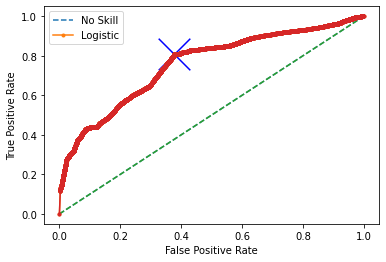

In [512]:
from sklearn.metrics import accuracy_score 
 
from numpy import sqrt
from numpy import argmax
 
# print(accuracy_score(results_gauss , test_labels))
# print(accuracy_score(results_berno , test_labels))


# calculate roc curves
fpr, tpr, thresholds = roc_curve(test_labels, results_gauss)
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker="x", color='blue', label='Best', s  = 1000)

# show the plot
pyplot.show()


In [513]:
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score


print('gaussNB results: ROC_AUC score: ', roc_auc_score(y_true= test_labels, y_score = results_gauss))
print('bernoNB results, ROC_AUC score: ', roc_auc_score(y_true=test_labels, y_score=results_berno))


gaussNB results: ROC_AUC score:  0.758174774772985
bernoNB results, ROC_AUC score:  0.7667764588180879


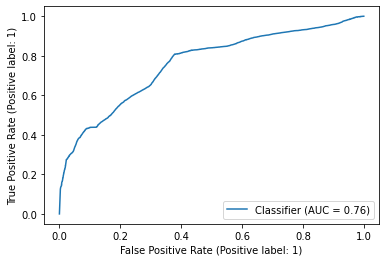

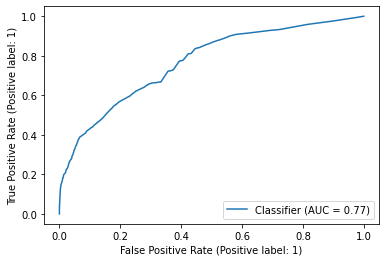

In [514]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(test_labels, y_pred=results_gauss,)
plt.show()
RocCurveDisplay.from_predictions(test_labels, y_pred = results_berno)
plt.show()



In [515]:
# from sklearn.metrics import confusion_matrix
# print('Confusion matrix formatting: \n  True Negative    False Positive \n False Negative      True Positive') 
# print('gaussianNB confusion matrix:\n ', confusion_matrix(test_labels, results_gauss))
# print('BernouilliNB confusion matrix \n', confusion_matrix(test_labels, results_berno))
from sklearn.metrics import classification_report

print(classification_report(test_labels, bnb.predict(test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     53089
           1       0.48      0.27      0.34      6182

    accuracy                           0.89     59271
   macro avg       0.70      0.62      0.64     59271
weighted avg       0.87      0.89      0.88     59271



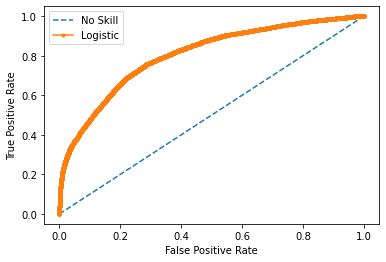

In [516]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

X.time = X.time/max(X.time)
trainX, testX, trainy, testy = train_test_split(
    X, y, test_size=0.5, random_state=2, stratify=y)
# fit a model
model = LogisticRegression(solver='saga', penalty='l1')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# plot the roc curve for the model
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()



random forest classifier: 

In [517]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(X, y)



RandomForestClassifier(max_depth=2, random_state=0)

Assessing precision - recall curve of the classifiers, using F-score

assesing model:  <class 'sklearn.naive_bayes.GaussianNB'>
Best Threshold=0.998538, F-Score=0.397
MATTHEWS CORRELATION COEFF. :  0.3312332928697532


C:\Users\XHK\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


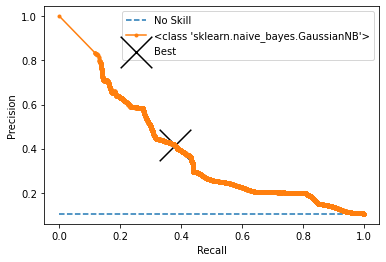

assesing model:  <class 'sklearn.naive_bayes.BernoulliNB'>
Best Threshold=0.262771, F-Score=0.396
MATTHEWS CORRELATION COEFF. :  0.3273509213470972


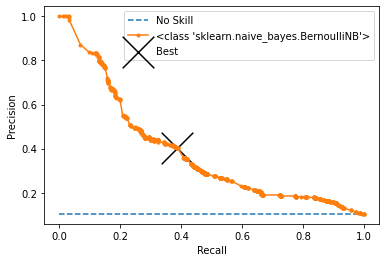

assesing model:  <class 'sklearn.linear_model._logistic.LogisticRegression'>
Best Threshold=0.219020, F-Score=0.412
MATTHEWS CORRELATION COEFF. :  0.3533561471463208


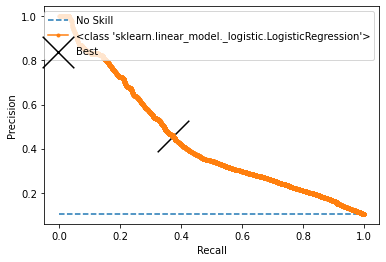

assesing model:  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Best Threshold=0.142351, F-Score=0.394
MATTHEWS CORRELATION COEFF. :  0.3303257389444076


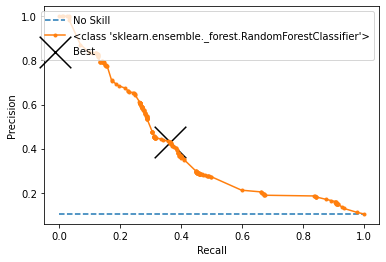

assesing model:  <class 'sklearn.naive_bayes.BernoulliNB'>
Best Threshold=0.264305, F-Score=0.394
MATTHEWS CORRELATION COEFF. :  0.32692962469958087


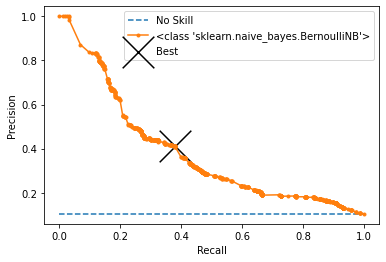

In [536]:

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from sklearn.metrics import fbeta_score
from sklearn.metrics import matthews_corrcoef
# generate dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
#                            n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train, test, train_labels, test_labels
# fit a model
logis = LogisticRegression(solver='saga')
logis.fit(trainX, trainy)

def f_score(model, data = (trainX, testX, trainy, testy)):
    print('assesing model: ', model.__class__)
    trainX, testX, trainy, testy = data
    # predict probabilities
    yhat = model.predict_proba(testX)
    # keep probabilities for the positive outcome only
    yhat = yhat[:, 1]
    # calculate roc curves
    precision, recall, thresholds = precision_recall_curve(testy, yhat)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    #beta = 2
    #fscore = (1+(beta**2)) * (2 * precision * recall) / \
        #((beta**2) * precision + recall)
    # locate the index of the largest f score
    ix = argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    print(
        f"MATTHEWS CORRELATION COEFF. :  {matthews_corrcoef(testy, yhat>thresholds[ix])}")
    # plot the roc curve for the model
    no_skill = len(testy[testy == 1]) / len(testy)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(recall, precision, marker='.', label=model.__class__)
    pyplot.scatter(recall[ix], precision[ix], marker='x',
                color='black', label='Best',s = 1000)
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.legend()
    # show the plot
    pyplot.show()
models = [gnb, bnb, logis, forest]
for model in models:
    f_score(model)
    
f_score(weighter)


LogisticRegression model has highest F1-score. At a threshold of 0.219 (i.e. something is classified as a 'goal' if predicted probability of not being a goal is lower than 0.219)

assesing model:  <class 'sklearn.naive_bayes.GaussianNB'>
Best Threshold=0.998549, F-Score=0.391
MATTHEWS CORRELATION COEFF. :  0.32669861527651944


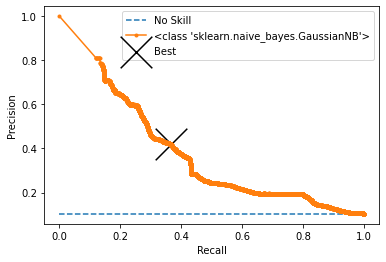

assesing model:  <class 'sklearn.naive_bayes.BernoulliNB'>
Best Threshold=0.262835, F-Score=0.385
MATTHEWS CORRELATION COEFF. :  0.31334475826970964


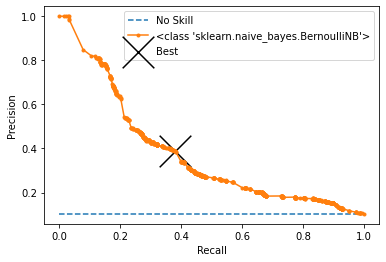

assesing model:  <class 'sklearn.linear_model._logistic.LogisticRegression'>
Best Threshold=0.191455, F-Score=0.404
MATTHEWS CORRELATION COEFF. :  0.3361334772897686


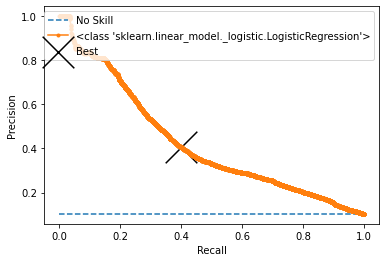

assesing model:  <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Best Threshold=0.139821, F-Score=0.376
MATTHEWS CORRELATION COEFF. :  0.31000538981649833


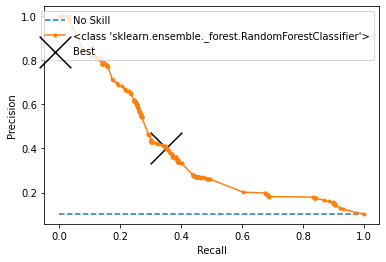

In [519]:
for model in models:
    f_score(model, data= (trainX, X_fr, trainy, y_fr))


In [520]:
# X_fr.iloc[argmax(bnb.predict_proba(X_fr)[:,1])]
# top20 = np.argpartition(bnb.predict_proba(X_fr)[:, 1], -20)[-20:]

# french_events.iloc[top20]


Conclusion: 

we can use the Bernoulli classifier to weight the goal-attempts, to get a new 'weighted_attempts' feature. 


In [521]:
attempt_weighter = bnb

french_events['french_attempt_weight'] =attempt_weighter.predict_proba(X_fr)[:,1]


In [522]:
#plt.hist(french_events[french_events.is_goal == 1]['french_attempt_weight'].values, bins =50)
bnb.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [523]:
event_final = pd.concat([events_original, french_events['french_attempt_weight']], axis = 'columns')

#event_final.to_csv('events_w_weighted_french.csv')



In [524]:
french_events['french_attempt_weight_logistic'] = logis.predict_proba(X_fr)[
    :, 1]

event_final2 = pd.concat(
    [events_original, french_events['french_attempt_weight_logistic']], axis='columns')

event_final2 = event_final2.rename({'french_attempt_weight_logistic' : 'french_attempt_weight'}, axis = 'columns')


In [525]:
#[i for i in zip(bnb.coef_[0, :], X_fr.columns.values)]
# event_final = pd.concat(
#     [events_original, french_events['french_attempt_weight']], axis='columns')
# sum(event_final['french_attempt_weight'].isna())
french_events
#french_events['french_attempt_weight']

#event_final2 = event_final2.rename(
    #{'french_attempt_weight_logistic': 'french_attempt_weight'}, axis='columns')

#event_final2.to_csv('events_w_weighted_french_logistic.csv')



,id_odsp,id_event,sort_order,time,event_type,event_type2,side,event_team,opponent,player,...,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break,french_attempt_weight,french_attempt_weight_logistic
374,CzPV312a/,CzPV312a6,6,8,Attempt,12.0,Away,Lorient,Paris Saint-Germain,julien quercia,...,Blocked,Blocked,0,Outside the box,right foot,Pass,Open play,0,0.011255,0.026030
378,CzPV312a/,CzPV312a10,10,11,Attempt,12.0,Away,Lorient,Paris Saint-Germain,kevin monnetpaquet,...,Misses to the right,Off target,0,Left side of the six yard box,left foot,Cross,Open play,0,0.192609,0.165937
379,CzPV312a/,CzPV312a11,11,11,Attempt,12.0,Away,Lorient,Paris Saint-Germain,yann jouffre,...,Bottom right corner,On target,0,Centre of the box,right foot,Pass,Open play,0,0.068551,0.176432
384,CzPV312a/,CzPV312a16,16,15,Attempt,12.0,Home,Paris Saint-Germain,Lorient,kevin gameiro,...,Misses to the left,Off target,0,Outside the box,right foot,Headed pass,Open play,0,0.021777,0.018963
395,CzPV312a/,CzPV312a27,27,26,Attempt,12.0,Home,Paris Saint-Germain,Lorient,kevin gameiro,...,Misses to the left,Off target,0,Centre of the box,head,Cross,Open play,0,0.114891,0.069846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940753,xY7uZwOI/,xY7uZwOI70,70,69,Attempt,12.0,Away,Lorient,AS Monaco,romain philippoteaux,...,High and wide,Off target,0,Left side of the box,left foot,Pass,Open play,0,0.034943,0.059537
940758,xY7uZwOI/,xY7uZwOI75,75,74,Attempt,12.0,Home,AS Monaco,Lorient,boschilia,...,High and wide,Off target,0,Centre of the box,left foot,Pass,Open play,0,0.065349,0.190973
940763,xY7uZwOI/,xY7uZwOI80,80,81,Attempt,NaN,Away,Lorient,AS Monaco,walid mesloub,...,Centre of the goal,On target,0,Right side of the box,right foot,None,Open play,0,0.085233,0.058915
940767,xY7uZwOI/,xY7uZwOI84,84,86,Attempt,12.0,Away,Lorient,AS Monaco,majeed waris,...,Centre of the goal,On target,0,Right side of the box,right foot,Through ball,Open play,0,0.204415,0.160153


In [526]:
import statsmodels
import statsmodels.formula.api as smf
import cvxopt

# X.columns  = [''.join(j) for j in [i.split() for i in X.columns]]   #removes stpaces
 

# Xtrain, Xtest, ytrain, ytest = train_test_split(
#     X, y, test_size=0.33, random_state=20)

# data = pd.concat([Xtrain,ytrain], axis = 'columns')
# test_data = pd.concat([Xtest, ytest], axis='columns')


# log_reg = smf.logit('is_goal ~ ' + '+'.join(Xtrain.columns.values),
#                     data=data).fit_regularized(method='l1')  # .fit(cov_type="hc1")
# #log_reg




In [527]:
# Xtrain, Xtest, ytrain, ytest = train_test_split(
#     X, y, test_size=0.33, random_state=20)

# '+'.join(Xtrain.columns.values)


# from sklearn.metrics import f1_score
# #print(log_reg.summary())
# y_pred = (log_reg.predict(Xtest) >0.20)

# f1_score(ytest,y_pred)






In [528]:
# print(logis)


In [529]:
from sklearn.model_selection import train_test_split
import random
log_nr = LogisticRegression(fit_intercept=True, penalty="l2")

##Generate 5 distinct random numbers - as random seeds for k test-train splits
k  = 8
randomlist = random.sample(range(1, 10000), k)

##Create features column
coeff_table = pd.DataFrame(X.columns, columns=["features"])

##Assemble coefficients over logistic regression models on 5 random data splits
#iterate over random states while keeping track of `i`
for i, state in enumerate(randomlist):
    train_x, test_x, train_y, test_y = train_test_split(X, y,   stratify=y,
                                                        test_size=0.3, random_state=state)  # 5 test-train splits
    log_nr.fit(train_x, train_y)  # fit logistic model
    coeff_table[f"coefficients_{i+1}"] = np.transpose(log_nr.coef_)

##Calculate mean and std error for model coefficients (from 5 models above)
coeff_table["mean_coeff"] = coeff_table.mean(axis=1)
coeff_table["se_coeff"] = coeff_table.iloc[:, 1:k+1].sem(axis=1)

#Calculate 95% CI intervals for feature coefficients
coeff_table["95ci_se_coeff"] = 1.96*coeff_table["se_coeff"]
coeff_table["coeff_95ci_LL"] = coeff_table["mean_coeff"] - coeff_table["95ci_se_coeff"]
coeff_table["coeff_95ci_UL"] = coeff_table["mean_coeff"] +coeff_table["95ci_se_coeff"]

coeff_table["odds_mean"] = np.exp(coeff_table["mean_coeff"])
coeff_table["95ci_odds_LL"] = np.exp(coeff_table["coeff_95ci_LL"])
coeff_table["95ci_odds_UL"] = np.exp(coeff_table["coeff_95ci_UL"])



C:\Users\XHK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\XHK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

coefficients per feature with a k folds CV logistic regression

In [530]:
coefs = coeff_table['features mean_coeff	se_coeff 95ci_se_coeff coeff_95ci_LL coeff_95ci_UL	odds_mean	95ci_odds_LL	95ci_odds_UL'.split()
            ].round(decimals=3)


In [531]:
coefs

,features,mean_coeff,se_coeff,95ci_se_coeff,coeff_95ci_LL,coeff_95ci_UL,odds_mean,95ci_odds_LL,95ci_odds_UL
0,time,0.077,0.005,0.009,0.068,0.086,1.080,1.071,1.090
1,side_Home,0.051,0.004,0.007,0.043,0.058,1.052,1.044,1.059
2,location_Difficult angle and long range,-1.980,0.031,0.060,-2.040,-1.920,0.138,0.130,0.147
3,location_Difficult angle on the left,-1.194,0.026,0.050,-1.244,-1.144,0.303,0.288,0.319
4,location_Difficult angle on the right,-1.150,0.021,0.041,-1.191,-1.109,0.317,0.304,0.330
5,location_Left side of the box,-1.256,0.006,0.011,-1.267,-1.244,0.285,0.282,0.288
6,location_Left side of the six yard box,0.324,0.017,0.034,0.290,0.357,1.382,1.336,1.430
7,location_Long range,-2.529,0.038,0.075,-2.603,-2.454,0.080,0.074,0.086
8,location_More than 35 yards,-2.429,0.022,0.044,-2.472,-2.385,0.088,0.084,0.092
9,location_More than 40 yards,-1.855,0.073,0.144,-1.999,-1.711,0.156,0.136,0.181


In [532]:
#coefs.to_csv('weighted_attempts_logistic_coefficients.csv')

C:\Users\XHK\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- assist_method
- bodypart
- location
- side
- situation
Feature names seen at fit time, yet now missing:
- assist_method_Headed pass
- assist_method_None
- assist_method_Pass
- assist_method_Through ball
- bodypart_left foot
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Away'